<a href="https://colab.research.google.com/github/SumeetSuley/SumeetSuley/blob/main/MLassign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("bank-additional-full.csv",sep = ";")

In [11]:
data.shape

(14770, 21)

In [3]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data['job'].replace('unknown',np.nan,inplace = True)
data['education'].replace('unknown',np.nan,inplace = True)
data['marital'].replace('unknown',np.nan,inplace = True)
data['loan'].replace('unknown',np.nan,inplace=True)
data['housing'].replace('unknown',np.nan,inplace=True)


In [5]:
data.isnull().sum()

age                 0
job               156
marital            24
education         672
default             0
housing           435
loan              435
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       1
euribor3m           1
nr.employed         1
y                   1
dtype: int64

In [6]:
data['loan'] = data['loan'].replace('yes',1)
data['loan'] = data['loan'].replace('no',0)


data['housing'] = data['housing'].replace('yes',1)
data['housing'] = data['housing'].replace('no',0)

data['contact'] = data['contact'].replace('telephone',1)
data['contact'] = data['contact'].replace('cellular',0)

data['default'] = data['default'].replace('yes',1)
data['default'] = data['default'].replace('no',0)
#data['default'].replace('unknown',np.nan,inplace=True)

data['poutcome'] = data['poutcome'].replace('success',1)
data['poutcome'] = data['poutcome'].replace('failure',0)

data['y'] = data['y'].replace('yes',1)
data['y'] = data['y'].replace('no',0)

In [7]:
data['poutcome'].replace('nonexistent',np.nan,inplace=True)
data['poutcome'].fillna(0,inplace = True)

In [8]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

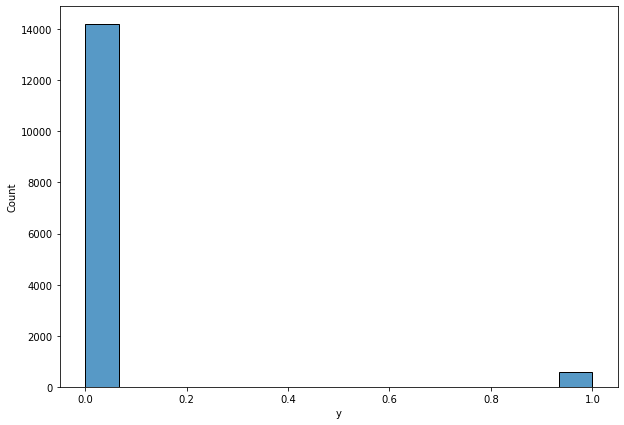

In [9]:
plt.figure(figsize=(10,7))
sns.histplot(x=data['y'],stat = 'count')

In [10]:
data['y'].value_counts()

0.0    14184
1.0      585
Name: y, dtype: int64

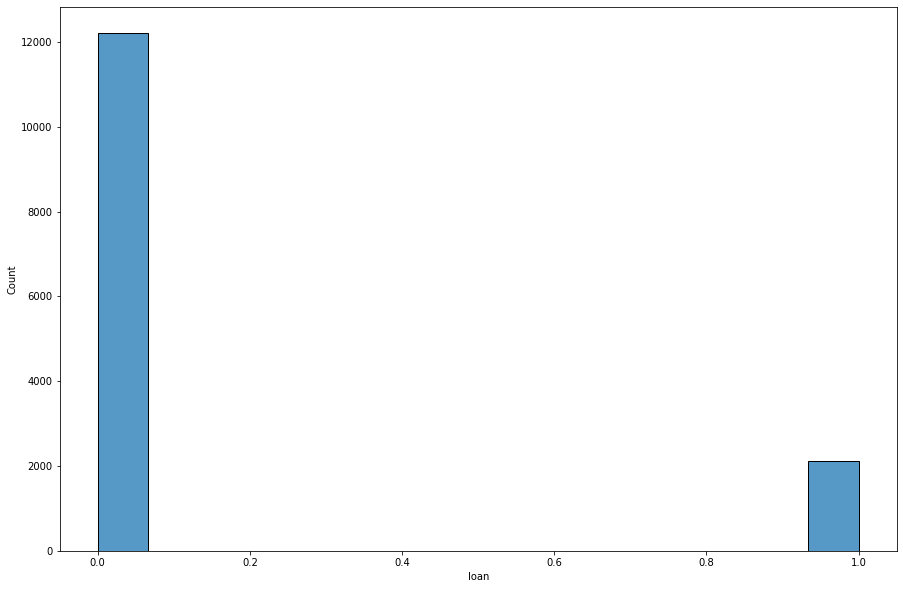

In [12]:
plt.figure(figsize=(15,10))
sns.histplot(x=data['loan'],stat = 'count')


In [13]:
data['loan'].value_counts()

0.0    12212
1.0     2123
Name: loan, dtype: int64

In [17]:
attributes = ['age', 'housing', 'loan',
       'contact','duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed','y']

In [18]:
targetvar = ['age', 'housing', 'loan',
       'contact','duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

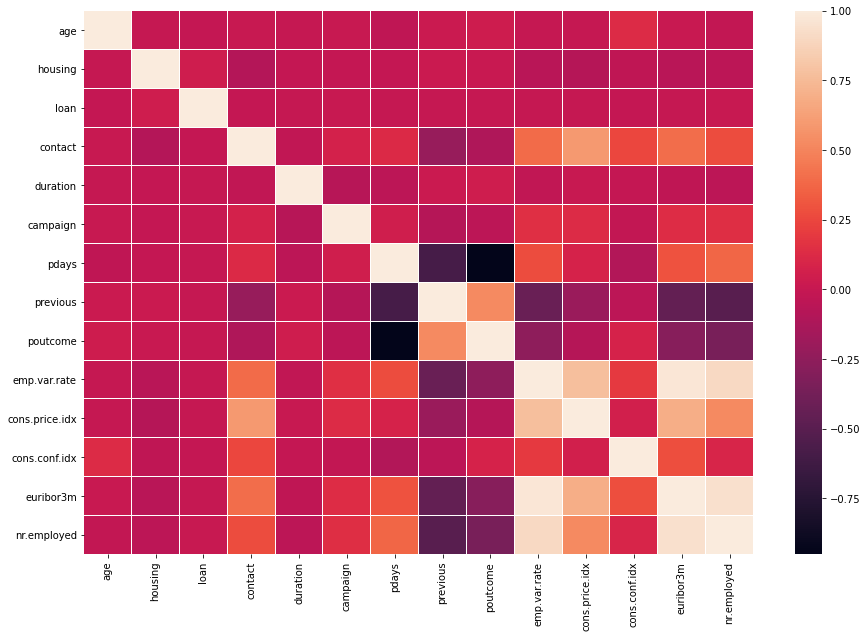

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data[targetvar].corr(),linewidths=0.05,linecolor="white")

In [19]:
newdat = data[attributes].dropna(axis = 0)

In [20]:
majorityclass = newdat[newdat['y']==0]
minorityclass = newdat[newdat['y']==1]

In [21]:
minorityclass.shape

(576, 15)

In [22]:
majorityclass.shape

(13758, 15)

In [23]:
minortysample = minorityclass.sample(n = majorityclass.shape[0],replace = True)

In [24]:
equaldat = pd.concat([majorityclass,minortysample],axis = 0)

In [25]:
x = equaldat[targetvar]
y = equaldat['y']
rfclf = RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.35)
rfclf.fit(X_train,y_train)
rfpred = rfclf.predict(X_test)

In [26]:
importances = rfclf.feature_importances_

In [27]:
for name, score in zip(X_train,rfclf.feature_importances_):
    print(name, score*100)

age 7.921075857284045
housing 0.7955759820828943
loan 0.6184309226522703
contact 0.7947291573508963
duration 81.13455496476469
campaign 3.8941864905965877
pdays 0.0
previous 0.0
poutcome 0.0
emp.var.rate 0.07687070287245094
cons.price.idx 0.2631881598128146
cons.conf.idx 0.4285126255015885
euribor3m 3.8525170538096183
nr.employed 0.22035808327214007


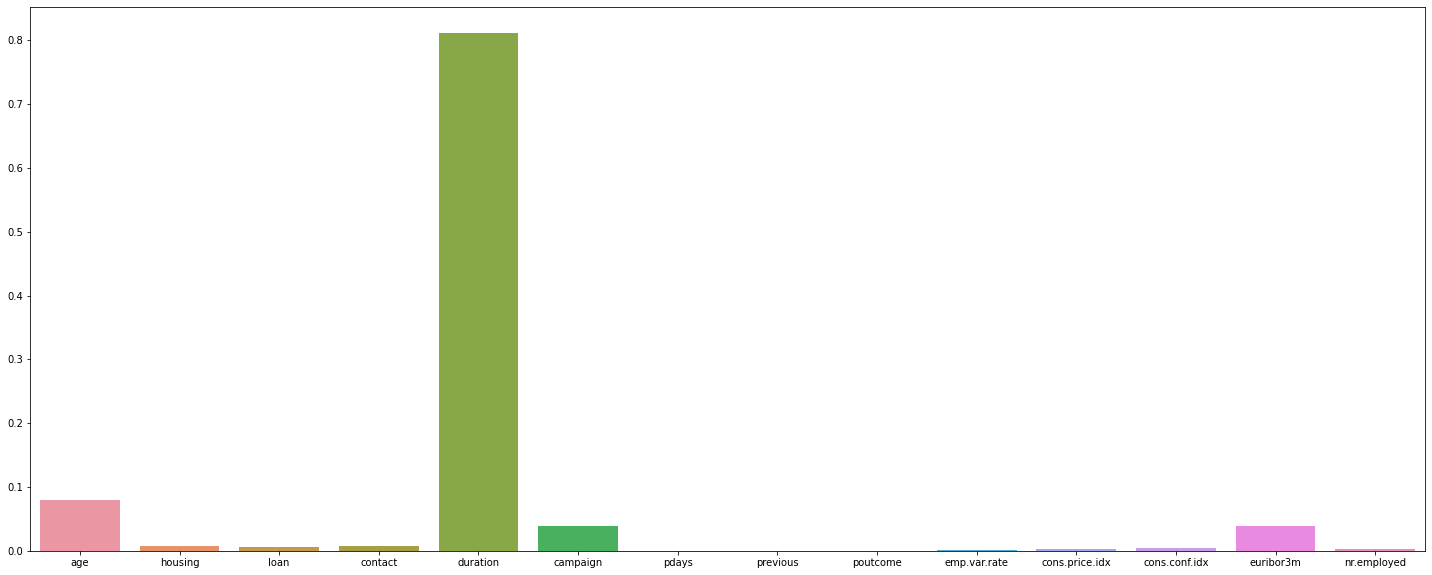

In [28]:
plt.figure(figsize=(25,10))
sns.barplot(x = X_train.columns, y = importances)

In [31]:
print("Recall score = ",recall_score(y_test,rfpred))
print("Precision score = ",precision_score(y_test,rfpred))
print("Accuracy score = ",accuracy_score(y_test,rfpred))
print("F score = ",f1_score(y_test,rfpred))

Recall score =  1.0
Precision score =  0.9742173112338858
Accuracy score =  0.9869172463918596
F score =  0.9869402985074627


In [33]:
confusion_matrix(y_test,rfpred)

array([[4744,  126],
       [   0, 4761]])

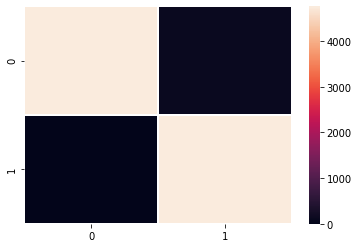

In [35]:
sns.heatmap(confusion_matrix(y_test,rfpred),linewidths=0.5,linecolor="white")

In [36]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
prediction = tree.predict(X_test)

In [37]:
print("Recall score = ",recall_score(y_test,prediction))
print("Precision score = ",precision_score(y_test,prediction))
print("Accuracy score = ",accuracy_score(y_test,prediction))
print("F score = ",f1_score(y_test,prediction))

Recall score =  1.0
Precision score =  0.9734205683909221
Accuracy score =  0.98650192088049
F score =  0.9865312888520513


In [38]:
tree_imp = tree.feature_importances_

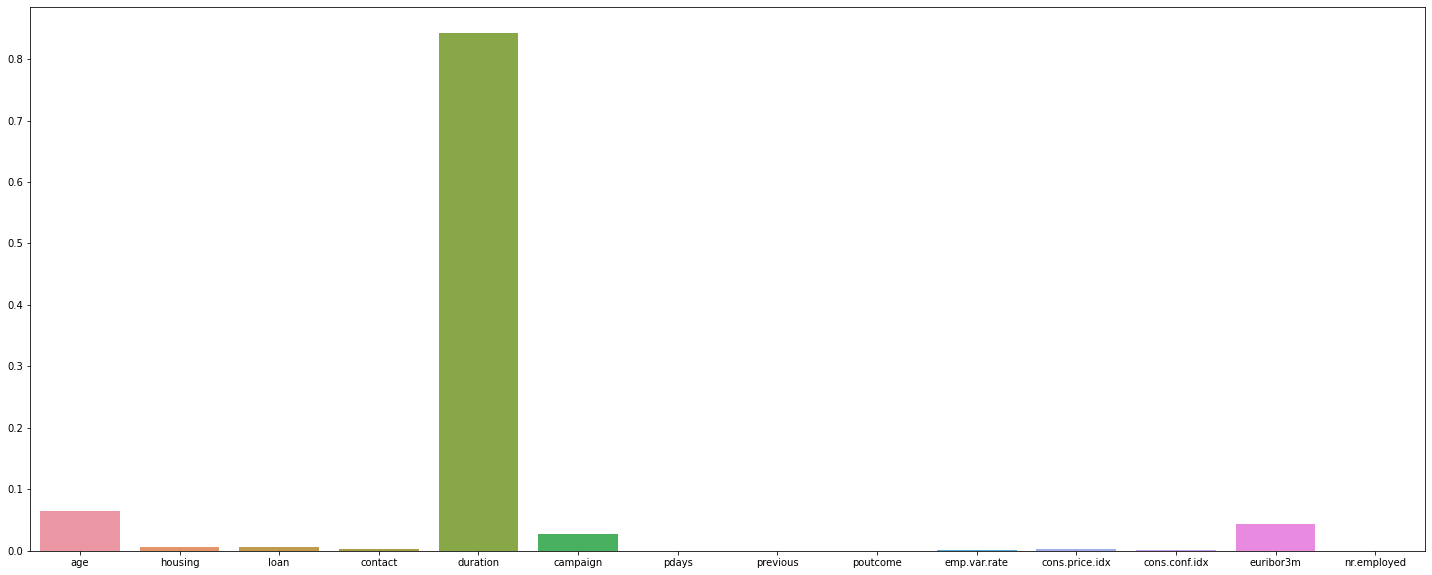

In [39]:
plt.figure(figsize=(25,10))
sns.barplot(x = X_train.columns, y = tree_imp)

In [40]:
bayesclf = BernoulliNB()
bayesclf.fit(X_train,y_train)
bayes_pred = bayesclf.predict(X_test)

In [41]:
print("Recall score = ",recall_score(y_test,bayes_pred))
print("Precision score = ",precision_score(y_test,bayes_pred))
print("Accuracy score = ",accuracy_score(y_test,bayes_pred))
print("F score = ",f1_score(y_test,bayes_pred))

Recall score =  0.2566687670657425
Precision score =  0.6462189317821259
Accuracy score =  0.5630775620392483
F score =  0.36740829825616356


In [ ]:
pred_proba = bayesclf.predict_proba(X_test)

In [ ]:
for col,prob in zip(X_test.columns,pred_proba):
    print(col, prob)

age [0.35602183 0.64397817]
housing [0.35602183 0.64397817]
loan [0.35602183 0.64397817]
contact [0.90677247 0.09322753]
duration [0.90001155 0.09998845]
campaign [0.12972905 0.87027095]
pdays [0.02862467 0.97137533]
previous [0.35602183 0.64397817]
poutcome [0.90001155 0.09998845]
emp.var.rate [0.74519778 0.25480222]
cons.price.idx [0.00853041 0.99146959]
cons.conf.idx [0.35602183 0.64397817]
euribor3m [0.90262815 0.09737185]
nr.employed [0.38089371 0.61910629]


In [ ]:
data.shape

(41188, 21)